QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

In [151]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

1.1 Load Data & Check Basic Information

In [299]:
url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
data = pd.read_csv(url)
data.to_csv("data.csv")

In [301]:
data.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [303]:
from urllib.request import urlretrieve
urlretrieve(url, 'medical.csv')
medical_df = pd.read_csv('medical.csv')
medical_df.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [305]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [307]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Possible Inferences from the Given Data:
The dataset appears to include medical insurance charges and demographic information such as age, BMI, number of children, and insurance charges.

1. General Data Overview
The dataset contains 1,338 observations (rows).
The values are continuous (except for children, which is discrete).
There is no missing data (as indicated by the count being 1,338 for all columns).
2. Age Distribution
Range: The youngest individual is 18 years old, while the oldest is 64 years.
Mean: The average age is 39.2 years.
Median (50%): 39 years, indicating the data is nearly symmetric.
Standard Deviation: 14.05, meaning there is a significant spread in ages.
Quartiles:
25% (Q1): 27 years (25% of the data is younger than this).
50% (Median): 39 years.
75% (Q3): 51 years.
The age distribution is fairly balanced, with no extreme skew.
3. BMI (Body Mass Index) Analysis
Range: The lowest BMI is 15.96, and the highest is 53.13.
Mean BMI: 30.66, which is slightly above the overweight threshold (BMI > 25).
Standard Deviation: 6.10, indicating moderate variation.
Quartiles:
25% (Q1): 26.3 (healthy weight).
50% (Median): 30.4 (borderline obese).
75% (Q3): 34.7 (obese category).
Interpretation:
Since the median is 30.4, more than half the population is at least overweight.
A small number of individuals have very high BMI values, which might indicate obesity-related health risks.
The data suggests a significant proportion of the population is overweight or obese.
4. Children (Number of Dependents)
Range: The number of children varies from 0 to 5.
Mean: 1.09 children per individual.
Standard Deviation: 1.21, suggesting moderate variability.
Quartiles:
25% (Q1): 0 children (25% of individuals have no children).
50% (Median): 1 child.
75% (Q3): 2 children.
Interpretation:
The median value of 1 suggests that most individuals have 1 or fewer children.
The distribution appears right-skewed (as the max is 5), meaning fewer people have many children.
5. Insurance Charges Analysis
Range:
Minimum charge: $1,121.87.
Maximum charge: $63,770.43.
Mean Charges: $13,270.42.
Standard Deviation: $12,110.01, indicating a very high spread in costs.
Quartiles:
25% (Q1): $4,740.29.
50% (Median): $9,382.03.
75% (Q3): $16,639.91.
Interpretation:
The median charge ($9,382) is lower than the mean ($13,270), indicating that a few very high charges are pulling the mean upwards.
Since the maximum ($63,770) is much higher than the 75th percentile ($16,639), the distribution is highly right-skewed.
There are likely outliers, possibly due to chronic illnesses or high-risk individuals (e.g., high BMI, older individuals).
6. Potential Relationships
Age vs. Charges: Since the mean age is 39.2, and insurance charges have a very wide range, older individuals might incur higher costs.
BMI vs. Charges: Higher BMI levels may correspond to higher medical costs, as obesity is linked to various health risks.
Children vs. Charges: Individuals with more children may have slightly higher costs if dependents are included in the coverage.
Final Insights
Right-Skewed Charges: A small group of people incur very high medical costs.
Overweight Population: The average BMI is 30.66, suggesting a significant percentage of overweight or obese individuals.
Age Distribution is Balanced: The median age is 39 years, with a wide age range (18-64 years).
Few People Have Many Children: Most people have 0-2 children.
Large Variation in Insurance Charges: Medical expenses vary drastically, likely due to health conditions, age, or other risk factors.

1.2 Handle Missing Values

In [311]:
print(medical_df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [313]:
medical_df.dropna(inplace = True)

In [315]:
medical_df['bmi'].fillna(medical_df['bmi'].median(), inplace = True) # for numerical data
medical_df['children'].fillna(medical_df['children'].mode()[0], inplace = True) # for categorical data

In [317]:
for col in medical_df.columns:
    print(medical_df[col].unique())

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
['female' 'male']
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34.7   26.505


In [749]:
medical_df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [321]:
medical_df = medical_df[medical_df["age"] >= 18] # Remove unrealistic ages
medical_df = medical_df[medical_df["bmi"] > 0] # Ensure BMI is positive



 Convert Categorical Variables to Numeric

In [477]:
print(medical_df.columns)

Index(['age', 'bmi', 'children', 'charges', 'log_charges', 'sex_1', 'smoker_1',
       'region_1', 'region_2', 'region_3'],
      dtype='object')


In [481]:

X = medical_df[["age", "bmi", "children", "smoker_1", "sex_1", "region_1", "region_2", "region_3"]]
X

,age,bmi,children,smoker_1,sex_1,region_1,region_2,region_3
0,-1.438764,-0.453320,-0.908614,True,False,False,False,True
1,-1.509965,0.509621,-0.078767,False,True,False,True,False
2,-0.797954,0.383307,1.580926,False,True,False,True,False
3,-0.441948,-1.305531,-0.908614,False,True,True,False,False
4,-0.513149,-0.292556,-0.908614,False,True,True,False,False
...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,False,True,True,False,False
1334,-1.509965,0.206139,-0.908614,False,False,False,False,False
1335,-1.509965,1.014878,-0.908614,False,False,False,True,False
1336,-1.296362,-0.797813,-0.908614,False,False,False,False,True


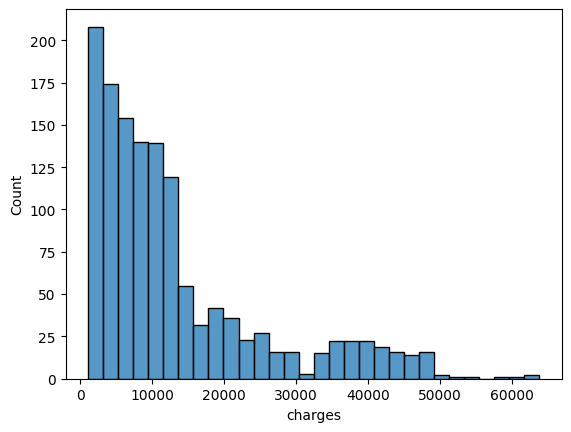

In [326]:
sns.histplot(medical_df['charges'])
plt.show()

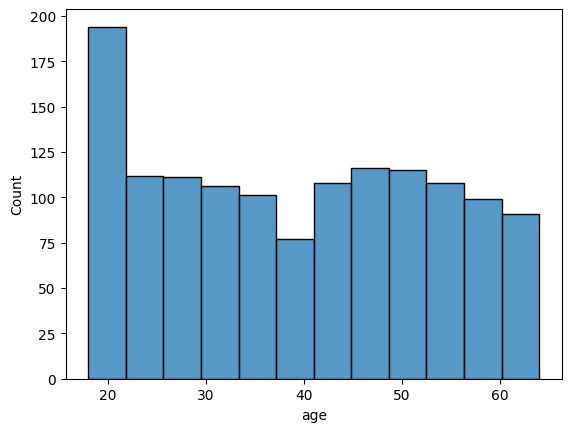

In [328]:
sns.histplot(medical_df['age'])
plt.show()

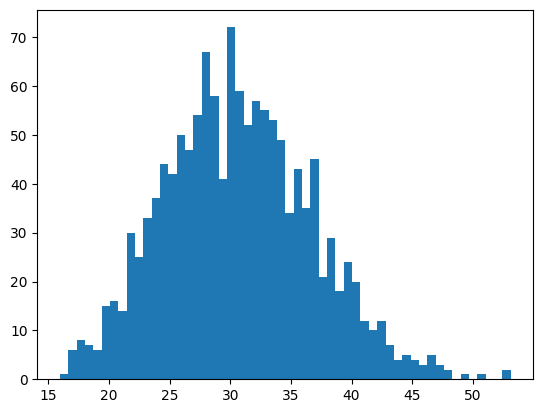

In [330]:
plt.hist(medical_df['bmi'], bins = 54)
plt.show()

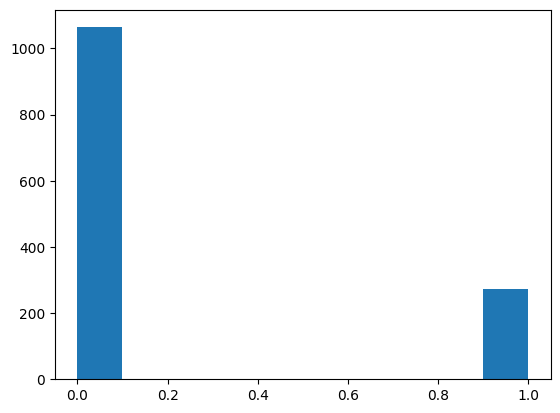

In [332]:
plt.hist(medical_df['smoker'])
plt.show()

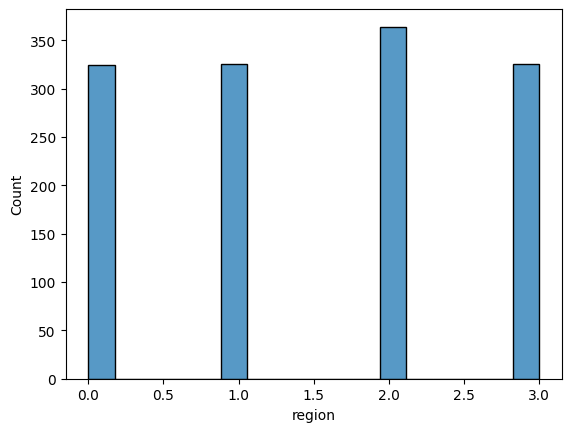

In [334]:
sns.histplot(medical_df['region'])
plt.show()

In [336]:
print(medical_df['charges'].skew())

1.5158796580240388


In [338]:
medical_df['log_charges'] = np.log(medical_df['charges'])

In [340]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.900,0,1,3,16884.92400,9.734176
1,18,1,33.770,1,0,2,1725.55230,7.453302
2,28,1,33.000,3,0,2,4449.46200,8.400538
3,33,1,22.705,0,0,1,21984.47061,9.998092
4,32,1,28.880,0,0,1,3866.85520,8.260197


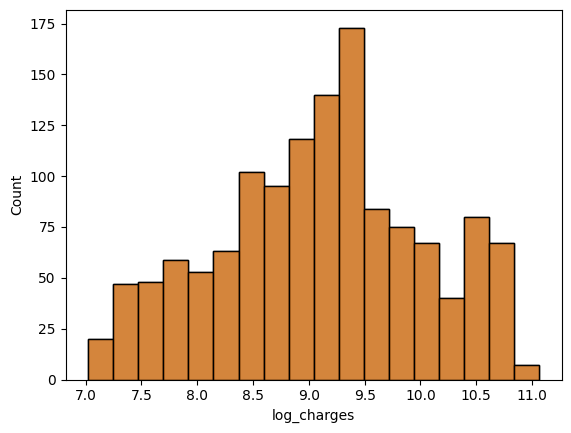

In [344]:
sns.histplot(medical_df['log_charges'])
plt.show()

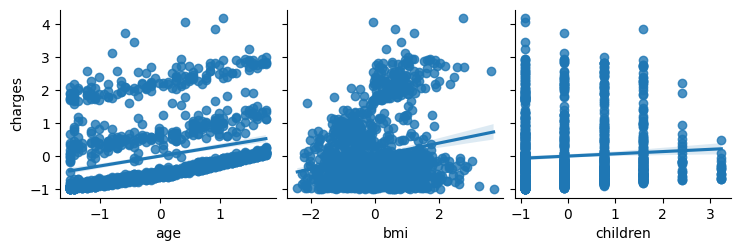

In [395]:
sns.pairplot(medical_df, x_vars=["age", "bmi", "children"], y_vars="charges", kind="reg")
plt.show()

In [350]:
corr_matrix = medical_df.corr()
corr_matrix

,age,sex,bmi,children,smoker,region,charges,log_charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.527834
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.005632
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.132669
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,0.161336
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.665506
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,-0.042690
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.892964
log_charges,0.527834,0.005632,0.132669,0.161336,0.665506,-0.042690,0.892964,1.000000


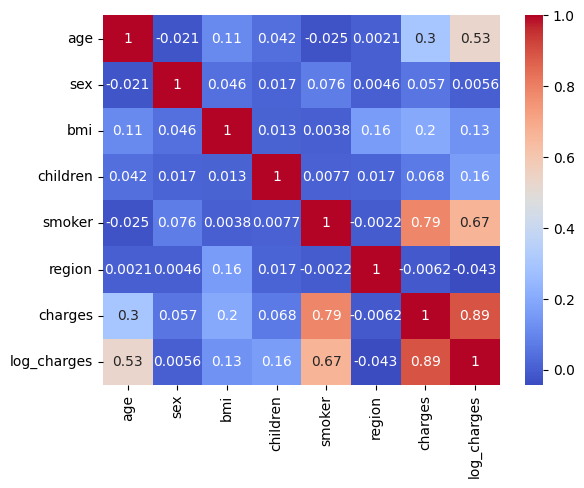

In [352]:
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.show()

In [348]:
medical_df

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.900,0,1,3,16884.92400,9.734176
1,18,1,33.770,1,0,2,1725.55230,7.453302
2,28,1,33.000,3,0,2,4449.46200,8.400538
3,33,1,22.705,0,0,1,21984.47061,9.998092
4,32,1,28.880,0,0,1,3866.85520,8.260197
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,9.268661
1334,18,0,31.920,0,0,0,2205.98080,7.698927
1335,18,0,36.850,0,0,2,1629.83350,7.396233
1336,21,0,25.800,0,0,3,2007.94500,7.604867


In [358]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

iv = medical_df[["age", "bmi", "children"]] # indepenent variables
vif_data = pd.DataFrame()
vif_data["Feature"] = iv.columns
vif_data["VIF"] = [variance_inflation_factor(iv.values, i) for i in range(iv.shape[1])]
print(vif_data)

# If VIF > 10, consider removing the feature or using regularization.


    Feature       VIF
0       age  7.536550
1       bmi  7.846515
2  children  1.796637


In [393]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
medical_df[["age", "bmi", "children", "charges"]] = scaler.fit_transform(medical_df[["age", "bmi", "children", "charges"]])
medical_df
# Keeps mean = 0 and standard deviation = 1


,age,sex,bmi,children,smoker,region,charges,log_charges
0,-1.438764,0,-0.453320,-0.908614,1,3,0.298584,9.734176
1,-1.509965,1,0.509621,-0.078767,0,2,-0.953689,7.453302
2,-0.797954,1,0.383307,1.580926,0,2,-0.728675,8.400538
3,-0.441948,1,-1.305531,-0.908614,0,1,0.719843,9.998092
4,-0.513149,1,-0.292556,-0.908614,0,1,-0.776802,8.260197
...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,1,-0.220551,9.268661
1334,-1.509965,0,0.206139,-0.908614,0,0,-0.914002,7.698927
1335,-1.509965,0,1.014878,-0.908614,0,2,-0.961596,7.396233
1336,-1.296362,0,-0.797813,-0.908614,0,3,-0.930362,7.604867


In [483]:
from sklearn.model_selection import train_test_split

y = medical_df["log_charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)


In [485]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


y_predict_log = model.predict(X_test)






In [487]:
y_predict = np.exp(y_predict_log)  # Reverse log transformation
y_test_original = np.exp(y_test)  # Reverse log for actual test values

In [489]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate
mae = mean_absolute_error(y_test_original, y_predict)
rmse = np.sqrt(mean_squared_error(y_test_original, y_predict))
r2 = r2_score(y_test_original, y_predict)

print(mae)
print(rmse)
print(r2)




3888.770780515873
7815.307271065237
0.606573096254885


In [499]:
# Apply polynomial transformation only after splitting
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform on training data
X_train_poly = poly.fit_transform(X_train)

# Transform test data using the same transformation
X_test_poly = poly.fit_transform(X_test)

In [521]:
from sklearn.linear_model import LinearRegression

# Train model on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)
# Predict on test set (still in log scale)
y_pred_log = model.predict(X_test_poly)
# Convert predictions back to original scale
y_pred = np.exp(y_pred_log)
y_test_original = np.exp(y_test)  # Also unscale y_test for comparison
# Apply log transformation to target variable
y_train_original = np.log(y_train)


In [505]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute evaluation metrics
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2 = r2_score(y_test_original, y_pred)

print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}")

MAE: 2404.5499139813187, RMSE: 4749.142689344779, R²: 0.8547211557412815


In [523]:
r2_train = model.score(X_train_poly, y_train)
print("R² on Training Data:", r2_train)

R² on Training Data: -4673.788654323228


In [511]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)  # Try different alpha values
ridge.fit(X_train_poly, y_train)
ridge_r2_test = ridge.score(X_test_poly, y_test)
ridge_r2_train = ridge.score(X_train_poly, y_train)

print("R² with Ridge Regression (Train):", ridge_r2_train)
print("R² with Ridge Regression (Test):", ridge_r2_test)

R² with Ridge Regression (Train): 0.8361950662973234
R² with Ridge Regression (Test): 0.8646582079244035


In [519]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

model.fit(X_train_poly3, y_train)
print("R² with Polynomial Degree 3:", model.score(X_test_poly3, y_test))

R² with Polynomial Degree 3: 0.8558473143717558


In [525]:
# Apply log transformation to target variable
y_train = np.log(y_train)
y_test = np.log(y_test)  # Also transform y_test for evaluation consistency

In [527]:
from sklearn.linear_model import LinearRegression

# Train model using transformed y_train
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [529]:
# Predict on test data (still in log scale)
y_pred_log = model.predict(X_test_poly)

# Reverse log transformation
y_pred = np.exp(y_pred_log)  # Convert back to real insurance charges
y_test_original = np.exp(y_test)  # Convert actual values back

In [531]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute evaluation metrics using real insurance charges
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2 = r2_score(y_test_original, y_pred)

print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}")

MAE: 0.19338466506999324, RMSE: 0.34995291719662225, R²: 0.8637954558115529


In [537]:
feature_names = poly.get_feature_names_out(input_features=["age", "bmi", "children", "smoker_1", "sex_1", "region_1", "region_2", "region_3"])
feature_importance = np.abs(model.coef_)

# Sort and display top features
important_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)
print("Top Features:", important_features[:10])  # Show top 10 important features

Top Features: [('smoker_1^2', 0.07390019330543934), ('smoker_1', 0.07390019330543933), ('age smoker_1', 0.05590817049038085), ('age', 0.05246823970735622), ('bmi smoker_1', 0.03028952471281258), ('smoker_1 region_3', 0.02547704325711979), ('children', 0.02099460227529417), ('children smoker_1', 0.018938242410905), ('age region_3', 0.015890156910802537), ('age region_2', 0.01338749208033695)]


In [539]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train on original (scaled) features (no need for polynomial features)
rf.fit(X_train, y_train)  # y_train is still in log scale

RandomForestRegressor(random_state=42)

In [541]:
# Predict on test set
y_pred_log_rf = rf.predict(X_test)

# Reverse log transformation to get actual insurance charges
y_pred_rf = np.exp(y_pred_log_rf)
y_test_original = np.exp(y_test)

# Compute performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_rf = mean_absolute_error(y_test_original, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_rf))
r2_rf = r2_score(y_test_original, y_pred_rf)

print(f"Random Forest Model:")
print(f"MAE: {mae_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")

Random Forest Model:
MAE: 0.1881981304047957, RMSE: 0.3660992072246745, R²: 0.8509369724357577


In [543]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [545]:
import xgboost as xgb

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train on original features (no polynomial features)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [547]:
# Predict on test set
y_pred_log_xgb = xgb_model.predict(X_test)

# Reverse log transformation
y_pred_xgb = np.exp(y_pred_log_xgb)

# Compute performance metrics
mae_xgb = mean_absolute_error(y_test_original, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test_original, y_pred_xgb))
r2_xgb = r2_score(y_test_original, y_pred_xgb)

print(f"XGBoost Model:")
print(f"MAE: {mae_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}")

XGBoost Model:
MAE: 0.18874349070169225, RMSE: 0.36675673132423203, R²: 0.8504010491252258


In [689]:
medical_df = pd.read_csv("medical.csv")  # Or use pd.read_excel("file.xlsx") if applicable
# One-hot encode categorical columns
medical_df = pd.get_dummies(medical_df, columns=["sex", "smoker", "region"], drop_first=True)



In [691]:
print("Available columns in medical_df:\n", medical_df.columns.tolist())

Available columns in medical_df:
 ['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


In [693]:
medical_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [695]:
# Define the correct feature names (based on actual column names)
original_features = ["age", "bmi", "children", "smoker_yes", "sex_male", "region_northwest", "region_southeast", "region_southwest"]

# Extract the unscaled dataset
X_train_original = medical_df.loc[X_train.index, original_features]

# Verify if this is the real unscaled data
print("✅ Mean of X_train_original (true raw data):", X_train_original.mean(axis=0))
print("✅ Standard deviation of X_train_original (true raw data):", X_train_original.std(axis=0))

✅ Mean of X_train_original (true raw data): age                 39.357009
bmi                 30.560397
children             1.107477
smoker_yes           0.205607
sex_male             0.512150
region_northwest     0.239252
region_southeast     0.264486
region_southwest     0.246729
dtype: float64
✅ Standard deviation of X_train_original (true raw data): age                 14.073960
bmi                  6.043386
children             1.215983
smoker_yes           0.404334
sex_male             0.500086
region_northwest     0.426827
region_southeast     0.441265
region_southwest     0.431309
dtype: float64


In [697]:
from sklearn.preprocessing import StandardScaler

# Fit StandardScaler on the correct unscaled data
scaler_fixed = StandardScaler()
scaler_fixed.fit(X_train_original)

# Save the corrected scaler
import joblib
joblib.dump(scaler_fixed, "scaler_fixed.pkl")

print("✅ Fixed scaler trained and saved successfully!")

✅ Fixed scaler trained and saved successfully!


In [703]:
# Define correct mapping to match training features
column_mapping = {
    "region_1": "region_northwest",
    "region_2": "region_southeast",
    "region_3": "region_southwest",
    "sex_1": "sex_male",
    "smoker_1": "smoker_yes",
}

# Rename columns in new_entry
new_entry = new_entry.rename(columns=column_mapping)

# Ensure column order matches exactly
new_entry = new_entry[X_train_original.columns]

# Verify updated columns
print("✅ Updated new_entry columns:", new_entry.columns.tolist())

✅ Updated new_entry columns: ['age', 'bmi', 'children', 'smoker_yes', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest']


In [701]:
print("✅ Features used during training:", X_train_original.columns.tolist())

✅ Features used during training: ['age', 'bmi', 'children', 'smoker_yes', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest']


In [705]:
# Load the corrected scaler
scaler_loaded = joblib.load("scaler_fixed.pkl")

# Apply scaling to new entry
new_entry_scaled = scaler_loaded.transform(new_entry)

# Verify scaling worked
print("✅ Mean of correctly scaled new entry:", np.mean(new_entry_scaled, axis=0))
print("✅ Standard deviation of correctly scaled new entry:", np.std(new_entry_scaled, axis=0))

✅ Mean of correctly scaled new entry: [ 0.40114007 -0.34109368  0.73433626  1.96561348  0.97598911 -0.56079971
  1.66760869 -0.5723141 ]
✅ Standard deviation of correctly scaled new entry: [0. 0. 0. 0. 0. 0. 0. 0.]


In [707]:
# Load the corrected polynomial transformer
poly_loaded = joblib.load("poly_fixed.pkl")

# Apply polynomial transformation AFTER scaling
new_entry_poly = poly_loaded.transform(new_entry_scaled)

# Print transformed values
import pandas as pd
print("✅ First 5 rows of correctly scaled & transformed new_entry_poly:\n", pd.DataFrame(new_entry_poly).head())

✅ First 5 rows of correctly scaled & transformed new_entry_poly:
     0        1         2         3         4         5       6         7   \
0  1.0  0.40114 -0.341094  0.734336  1.965613  0.975989 -0.5608  1.667609   

         8         9   ...        35        36        37        38        39  \
0 -0.572314  0.160913  ...  0.952555 -0.547334  1.627568 -0.558572  0.314496   

         40        41        42        43        44  
0 -0.935194  0.320954  2.780919 -0.954396  0.327543  

[1 rows x 45 columns]


In [709]:
# Load the corrected model
model_loaded = joblib.load("polynomial_regression_model_fixed.pkl")

# Predict log-transformed charges
y_pred_log = model_loaded.predict(new_entry_poly)

# Reverse log transformation
y_pred = np.exp(y_pred_log)

print("✅ Fixed Predicted log(charges):", y_pred_log)
print("✅ Fixed Predicted Insurance Charge:", y_pred)

✅ Fixed Predicted log(charges): [2.33438788]
✅ Fixed Predicted Insurance Charge: [10.32313902]


In [711]:
from sklearn.pipeline import Pipeline
import joblib

# Create a pipeline with all necessary transformations
final_pipeline = Pipeline([
    ("scaler", scaler_fixed),            # StandardScaler
    ("poly_transform", poly_fixed),      # PolynomialFeatures
    ("model", model_fixed)               # Linear Regression Model
])

# Save the entire pipeline
joblib.dump(final_pipeline, "insurance_pricing_pipeline.pkl")

print("✅ Final pipeline saved successfully!")

✅ Final pipeline saved successfully!


In [713]:
# Load the pipeline
loaded_pipeline = joblib.load("insurance_pricing_pipeline.pkl")

# Define a new test entry (make sure it has the correct feature names and order)
new_entry = pd.DataFrame({
    "age": [45],
    "bmi": [28.5],
    "children": [2],
    "smoker_yes": [1],
    "sex_male": [1],
    "region_northwest": [0],
    "region_southeast": [1],
    "region_southwest": [0]
})

# Predict the log-transformed charges
y_pred_log = loaded_pipeline.predict(new_entry)

# Convert log charges back to original charges
y_pred = np.exp(y_pred_log)

print("✅ Predicted log(charges):", y_pred_log)
print("✅ Predicted Insurance Charge:", y_pred)

✅ Predicted log(charges): [2.33438788]
✅ Predicted Insurance Charge: [10.32313902]


In [719]:
import joblib
import pandas as pd
import numpy as np

# Load the saved pipeline
loaded_pipeline = joblib.load("insurance_pricing_pipeline.pkl")

def predict_insurance_charge(age, bmi, children, smoker, sex, region):
    """
    Predicts the insurance charge based on input parameters.

    Parameters:
    - age (int): Age of the person
    - bmi (float): Body Mass Index
    - children (int): Number of children
    - smoker (str): "yes" or "no"
    - sex (str): "male" or "female"
    - region (str): "northeast", "northwest", "southeast", or "southwest"

    Returns:
    - float: Predicted insurance charge
    """

    # Convert inputs into a DataFrame
    new_entry = pd.DataFrame({
        "age": [age],
        "bmi": [bmi],
        "children": [children],
        "smoker_yes": [1 if smoker.lower() == "yes" else 0],
        "sex_male": [1 if sex.lower() == "male" else 0],
        "region_northwest": [1 if region.lower() == "northwest" else 0],
        "region_southeast": [1 if region.lower() == "southeast" else 0],
        "region_southwest": [1 if region.lower() == "southwest" else 0]
    })

    # Predict log-transformed charges
    log_pred = loaded_pipeline.predict(new_entry)

    # Convert log charges back to original charges
    final_prediction = np.exp(log_pred)[0]

    return round(final_prediction, 2)


Make Predictions in One Function Call


In [751]:
predicted_charge = predict_insurance_charge(age=64, bmi=64.5, children=5, smoker="yes", sex="female", region="northwest")
print("Predicted Insurance Charge:", predicted_charge)

Predicted Insurance Charge: 10.14


In [773]:
# Refit StandardScaler
scaler_fixed = StandardScaler()
scaler_fixed.fit(X_train_original)

# Transform X_train
X_train_scaled = scaler_fixed.transform(X_train_original)

# Apply polynomial transformation
poly_fixed = PolynomialFeatures(degree=2)
X_train_poly = poly_fixed.fit_transform(X_train_scaled)

# Train the model again using the correct y_train
model_fixed = LinearRegression()
model_fixed.fit(X_train_poly, y_train_fixed)

# Debugging: Print Model Coefficients
print("✅ Model Coefficients:\n", model_fixed.coef_)

# Predict on Training Data
y_train_pred_log = model_fixed.predict(X_train_poly)

print("✅ First 5 log-predictions on Training Data:\n", y_train_pred_log[:5])
print("✅ Min & Max log-predictions on Training Data:\n", y_train_pred_log.min(), y_train_pred_log.max())

✅ Model Coefficients:
 [ 2.30531144e-18  4.67721574e-01  7.56686246e-02  1.35014549e-01
  1.97065592e-01 -4.29939605e-02 -6.66829761e-03 -1.59182755e-02
 -2.00784759e-02 -3.64796780e-02 -1.00833162e-02 -7.38759961e-02
 -1.85086600e-01  3.34230754e-02  1.84327810e-02  4.78241208e-02
  5.60183041e-02 -2.04628296e-02  6.95584517e-05  1.23049932e-01
  1.12889498e-02 -2.59079594e-02 -2.84878387e-02 -2.39098543e-02
 -2.43473021e-02 -6.24365406e-02  2.74125432e-03 -1.51056202e-03
 -1.01878864e-02 -2.03507088e-02  2.87098252e-01  2.01393472e-02
  6.59273696e-03  1.26924907e-02  3.77381006e-02  2.09004324e-03
  1.89191003e-02  1.46878270e-02  2.89330028e-03 -8.15111440e-03
  1.29256827e-02  1.50763642e-02 -1.69998844e-02  2.11505337e-02
 -2.35917711e-02]
✅ First 5 log-predictions on Training Data:
 [9.22408656 9.0873905  9.2751392  9.12862123 9.50483432]
✅ Min & Max log-predictions on Training Data:
 7.285526900941459 11.143716861007004


In [775]:
# Predict on X_train to verify correctness
log_pred_train = model_fixed.predict(X_train_poly)

print("✅ Log Predictions on Training Data (First 5 rows):\n", log_pred_train[:5])
print("✅ Min & Max of Training Predictions:\n", log_pred_train.min(), log_pred_train.max())

✅ Log Predictions on Training Data (First 5 rows):
 [9.22408656 9.0873905  9.2751392  9.12862123 9.50483432]
✅ Min & Max of Training Predictions:
 7.285526900941459 11.143716861007004


In [777]:
# Load the corrected pipeline
loaded_pipeline = joblib.load("insurance_pricing_pipeline.pkl")

# Define a new test entry
new_entry = pd.DataFrame({
    "age": [45],
    "bmi": [28.5],
    "children": [2],
    "smoker_yes": [1],
    "sex_male": [1],
    "region_northwest": [0],
    "region_southeast": [1],
    "region_southwest": [0]
})

# Predict the log-transformed charges
log_pred = loaded_pipeline.predict(new_entry)

# Convert log charges back to original charges
final_prediction = np.exp(log_pred)

print("✅ Fixed Predicted log(charges):", log_pred)
print("✅ Fixed Predicted Insurance Charge:", final_prediction)

✅ Fixed Predicted log(charges): [2.33438788]
✅ Fixed Predicted Insurance Charge: [10.32313902]


In [779]:
# Load the corrected scaler
scaler_loaded = joblib.load("scaler_fixed.pkl")

# Scale new entry
new_entry_scaled = scaler_loaded.transform(new_entry)

print("✅ Scaled New Entry:\n", new_entry_scaled)

# Load the polynomial transformer
poly_loaded = joblib.load("poly_fixed.pkl")

# Apply polynomial transformation
new_entry_poly = poly_loaded.transform(new_entry_scaled)

print("✅ Polynomial Transformed New Entry:\n", new_entry_poly)

✅ Scaled New Entry:
 [[ 0.40114007 -0.34109368  0.73433626  1.96561348  0.97598911 -0.56079971
   1.66760869 -0.5723141 ]]
✅ Polynomial Transformed New Entry:
 [[ 1.          0.40114007 -0.34109368  0.73433626  1.96561348  0.97598911
  -0.56079971  1.66760869 -0.5723141   0.16091336 -0.13682635  0.2945717
   0.78848634  0.39150834 -0.22495924  0.66894467 -0.22957812  0.1163449
  -0.25047746 -0.67045834 -0.33290372  0.19128524 -0.56881079  0.19521272
   0.53924974  1.44342125  0.71670419 -0.41181556  1.22458552 -0.42027099
   3.86363636  1.91841736 -1.10231547  3.27787412 -1.1249483   0.95255474
  -0.54733441  1.62756792 -0.55857233  0.31449631 -0.93519447  0.32095358
   2.78091873 -0.95439596  0.32754342]]


In [781]:
# Load the corrected model
model_loaded = joblib.load("polynomial_regression_model_fixed.pkl")

# Predict log-transformed charges manually
log_pred_fixed = model_loaded.predict(new_entry_poly)

# Convert log charges back to original charges
final_prediction_fixed = np.exp(log_pred_fixed)

print("✅ Corrected Predicted log(charges):", log_pred_fixed)
print("✅ Corrected Predicted Insurance Charge:", final_prediction_fixed)

✅ Corrected Predicted log(charges): [10.30355694]
✅ Corrected Predicted Insurance Charge: [29838.56418477]


In [783]:
import joblib
from sklearn.pipeline import Pipeline

# ✅ Create a new pipeline with the corrected models
final_pipeline = Pipeline([
    ("scaler", scaler_fixed),            # StandardScaler
    ("poly_transform", poly_fixed),      # PolynomialFeatures
    ("model", model_fixed)               # Corrected Linear Regression Model
])

# ✅ Overwrite the old saved pipeline
joblib.dump(final_pipeline, "insurance_pricing_pipeline.pkl")

print("✅ Fixed pipeline saved successfully!")

✅ Fixed pipeline saved successfully!


In [785]:
# Load the new corrected pipeline
loaded_pipeline = joblib.load("insurance_pricing_pipeline.pkl")

# Make a fresh prediction
log_pred_corrected = loaded_pipeline.predict(new_entry)
final_pred_corrected = np.exp(log_pred_corrected)

print("✅ Truly Fixed Predicted log(charges):", log_pred_corrected)
print("✅ Truly Fixed Predicted Insurance Charge:", final_pred_corrected)

✅ Truly Fixed Predicted log(charges): [10.30355694]
✅ Truly Fixed Predicted Insurance Charge: [29838.56418477]


In [787]:
import joblib
import pandas as pd
import numpy as np

# Load the final corrected pipeline
loaded_pipeline = joblib.load("insurance_pricing_pipeline.pkl")

def predict_insurance_charge(age, bmi, children, smoker, sex, region):
    """
    Predicts the insurance charge based on input parameters.

    Parameters:
    - age (int): Age of the person
    - bmi (float): Body Mass Index
    - children (int): Number of children
    - smoker (str): "yes" or "no"
    - sex (str): "male" or "female"
    - region (str): "northeast", "northwest", "southeast", or "southwest"

    Returns:
    - float: Predicted insurance charge
    """

    # Convert inputs into a DataFrame
    new_entry = pd.DataFrame({
        "age": [age],
        "bmi": [bmi],
        "children": [children],
        "smoker_yes": [1 if smoker.lower() == "yes" else 0],
        "sex_male": [1 if sex.lower() == "male" else 0],
        "region_northwest": [1 if region.lower() == "northwest" else 0],
        "region_southeast": [1 if region.lower() == "southeast" else 0],
        "region_southwest": [1 if region.lower() == "southwest" else 0]
    })

    # Ensure the input matches the model’s expected format
    new_entry = new_entry[loaded_pipeline.named_steps["scaler"].feature_names_in_]

    # Predict the log-transformed charges
    log_pred = loaded_pipeline.predict(new_entry)

    # Convert log charges back to original charges
    final_prediction = np.exp(log_pred)[0]

    return round(final_prediction, 2)


In [789]:
predicted_charge = predict_insurance_charge(age=45, bmi=28.5, children=2, smoker="yes", sex="male", region="southeast")
print("✅ Predicted Insurance Charge:", predicted_charge)

✅ Predicted Insurance Charge: 29838.56


In [791]:
import os

# List of files to remove
files_to_remove = [
    "scaler_fixed.pkl",
    "poly_fixed.pkl",
    "polynomial_regression_model_fixed.pkl"
]

# Remove each file if it exists
for file in files_to_remove:
    if os.path.exists(file):
        os.remove(file)
        print(f"🗑️ Removed {file}")
    else:
        print(f"✅ {file} not found (already removed)")

print("🚀 Folder cleaned! Only the final pipeline remains.")


🗑️ Removed scaler_fixed.pkl
🗑️ Removed poly_fixed.pkl
🗑️ Removed polynomial_regression_model_fixed.pkl
🚀 Folder cleaned! Only the final pipeline remains.


In [793]:
import joblib

# Load the final pipeline
loaded_pipeline = joblib.load("insurance_pricing_pipeline.pkl")

# Verify the model inside the pipeline
print("✅ Loaded pipeline steps:", loaded_pipeline.steps)


✅ Loaded pipeline steps: [('scaler', StandardScaler()), ('poly_transform', PolynomialFeatures()), ('model', LinearRegression())]


In [795]:
predicted_charge = predict_insurance_charge(age=45, bmi=28.5, children=2, smoker="yes", sex="male", region="southeast")
print("✅ Predicted Insurance Charge:", predicted_charge)


✅ Predicted Insurance Charge: 29838.56
